In [270]:
"""
Description: Build a classification model using the Iris dataset to predict the species of a flower based on its features 
(sepal and petal dimensions).
• Skills: Data exploration, classification models, visualization

https://www.youtube.com/watch?v=rvCufeNddds
"""

'\nDescription: Build a classification model using the Iris dataset to predict the species of a flower based on its features \n(sepal and petal dimensions).\n• Skills: Data exploration, classification models, visualization\n\nhttps://www.youtube.com/watch?v=rvCufeNddds\n'

In [271]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col=["Sepal length","Sepal width","Petal length","Petal width","class"]
data=pd.read_csv(url,names=col)
data

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [272]:
data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
class           0
dtype: int64

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [274]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["class"]=le.fit_transform(data["class"])

In [275]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


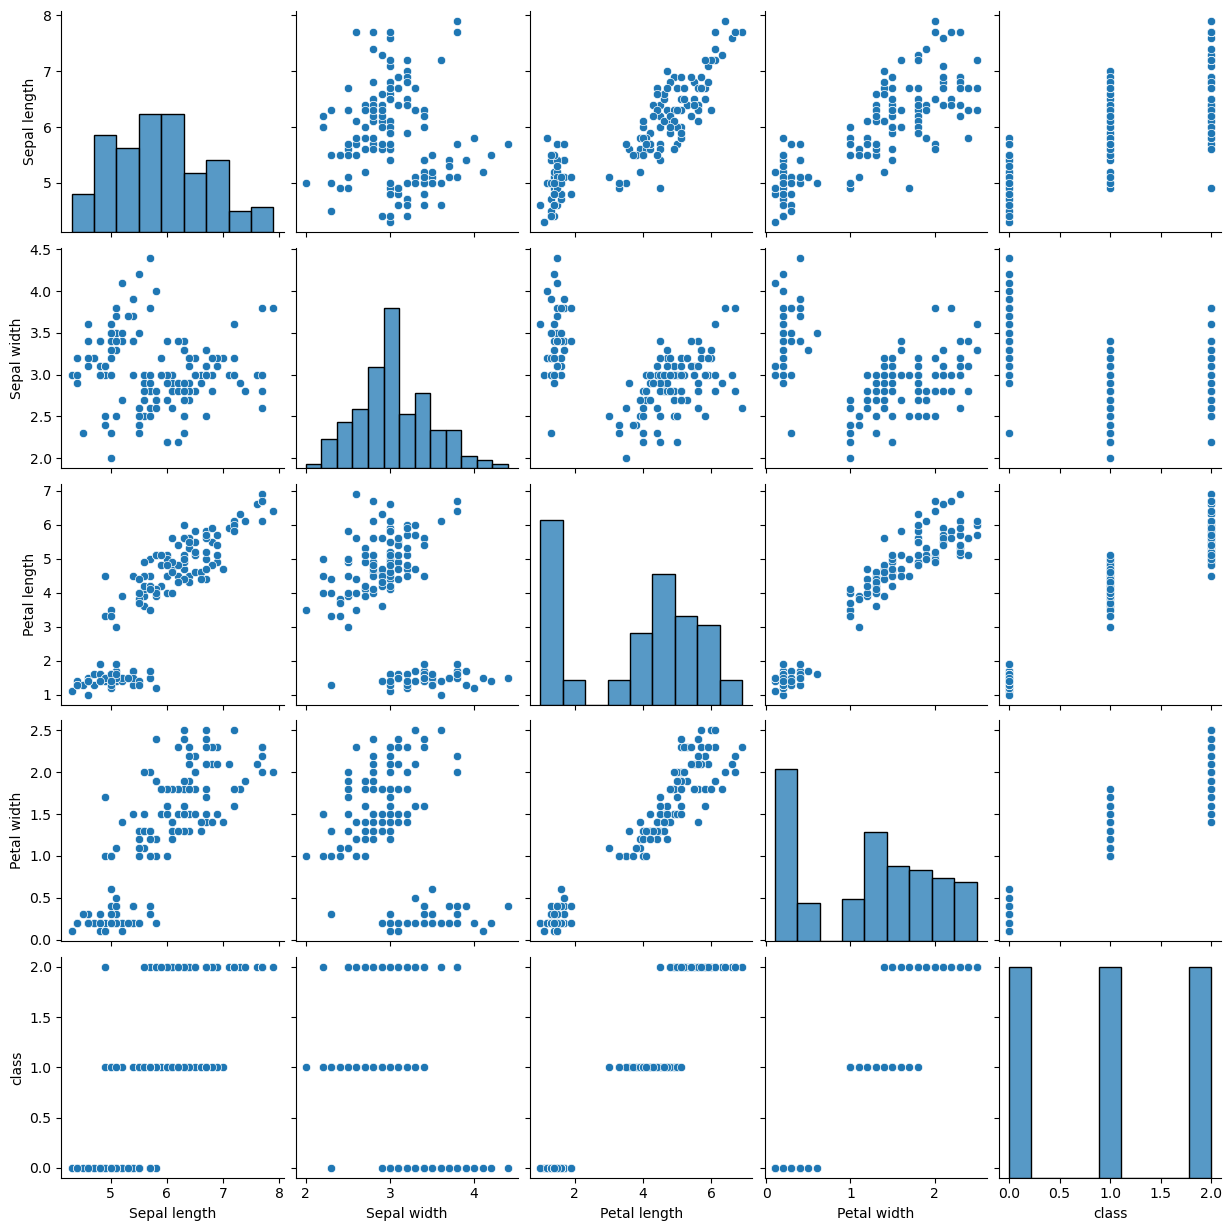

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data)
plt.show()

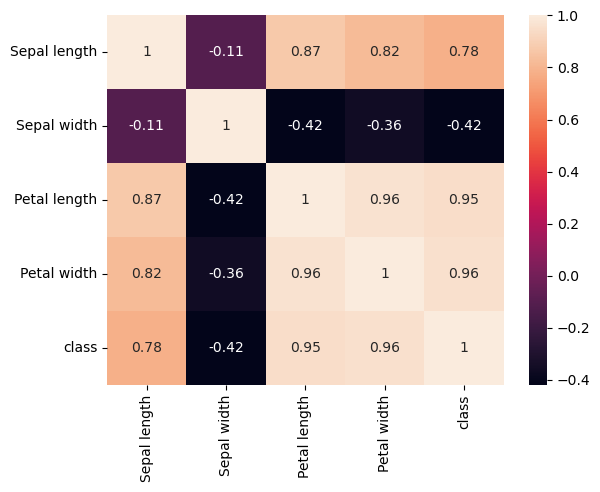

In [277]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [278]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [279]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (105, 4)
y_train shape :  (105,)
x_test shape :  (45, 4)
y_test shape :  (45,)


In [280]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [282]:
y_pred=knn.predict(x_test)
y_pred

array([0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2])

In [283]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report,accuracy_score
import numpy as np

test_sc=knn.score(x_test,y_test)
train_sc=knn.score(x_train,y_train)
print("Test score : ",test_sc)
print("Train score : ",train_sc)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root mean squared error : ",rmse)
print()
acc_sc=accuracy_score(y_test,y_pred)
clf_rpt=classification_report(y_test,y_pred)
print("Accuracy score : ",acc_sc)
print("Classification Report : ",clf_rpt)

Test score :  0.9111111111111111
Train score :  0.9714285714285714
Mean Absolute error :  0.08888888888888889
Mean Squared error :  0.08888888888888889
Root mean squared error :  0.29814239699997197

Accuracy score :  0.9111111111111111
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.86      0.86      0.86        14
           2       0.85      0.85      0.85        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45



In [284]:
import numpy as np # Test function to make predictions
def test(Sepal_length, Sepal_width, Petal_length, Petal_width):
    # Prepare the test data
    test_data = np.array([[Sepal_length, Sepal_width, Petal_length, Petal_width]])
    
    # Predict the result using the trained model
    predict_test = knn.predict(test_data)
    
    # Print the test data and prediction result
    print(f"Sepal length: {Sepal_length}")
    print(f"Sepal width: {Sepal_width}")
    print(f"Petal length: {Petal_length}")
    print(f"Petal width: {Petal_width}")
    print(f"Predicted result: {predict_test[0]}")  # Show the predicted class label
    print("*"*50)

# Data for testing
test_data = [
    (5.5, 2.5, 1.4, 0.1),
    (4.6, 3.1, 1.5, 0.2),
    (5.0, 3.6, 1.4, 0.2),
    (6.2, 2.2, 4.5, 1.5),               
    (5.6, 2.5, 3.9, 1.1),
    (6.7, 3.0, 5.2, 2.3),
    (6.3, 2.5, 5.0, 1.9),
    (6.5, 3.0, 5.2, 2.0)
]

# Loop through test_data and call the test function for each tuple
for i in test_data:
    test(*i)  # Unpack the tuple into separate arguments

Sepal length: 5.5
Sepal width: 2.5
Petal length: 1.4
Petal width: 0.1
Predicted result: 2
**************************************************
Sepal length: 4.6
Sepal width: 3.1
Petal length: 1.5
Petal width: 0.2
Predicted result: 2
**************************************************
Sepal length: 5.0
Sepal width: 3.6
Petal length: 1.4
Petal width: 0.2
Predicted result: 2
**************************************************
Sepal length: 6.2
Sepal width: 2.2
Petal length: 4.5
Petal width: 1.5
Predicted result: 2
**************************************************
Sepal length: 5.6
Sepal width: 2.5
Petal length: 3.9
Petal width: 1.1
Predicted result: 2
**************************************************
Sepal length: 6.7
Sepal width: 3.0
Petal length: 5.2
Petal width: 2.3
Predicted result: 2
**************************************************
Sepal length: 6.3
Sepal width: 2.5
Petal length: 5.0
Petal width: 1.9
Predicted result: 2
**************************************************
Sepal length: